In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Exported successsfully")

Exported successsfully


In [3]:
#reading the data
url="http://bit.ly/w-data" 
data= pd.read_csv(url) #reading the file
print("Data read Successfully")
print(data)

Data read Successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
#finding missing values
miss=data.isnull().sum() # helps to find missing values in the data
print(miss)

Hours     0
Scores    0
dtype: int64


In [5]:
dt=data.describe() #helps to describe the details of dataset
print(dt)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Text(0.5, 1.0, 'Score vs Percentage')

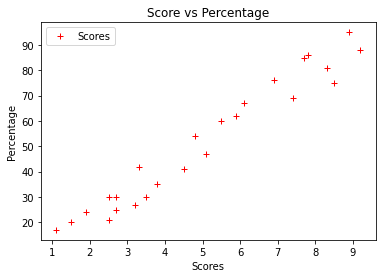

In [37]:
data.plot(x="Hours",y="Scores",style='+r') #plotting our data on 2-D graph
plt.xlabel("Scores")
plt.ylabel("Percentage")
plt.title("Score vs Percentage")

In [7]:
#preparing attributes and values
x=data.iloc[:, :-1].values #attributes 
y=data.iloc[: ,1].values   #values->whose value to predicted
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [8]:
#Preaparing data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)# split the data into 70% to training and 30% to test
print(x_train)
print(x_test)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [9]:
#Training
from sklearn.linear_model import LinearRegression
rg= LinearRegression()
rg.fit(x_train,y_train) #finds the best value for intercept and slope
print(rg.intercept_)
print(rg.coef_)

2.3708153823418883
[9.78856669]


In [10]:
#actual vs predicted
y_pred=rg.predict(x_test)
pred=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})#compares the values
print(pred)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


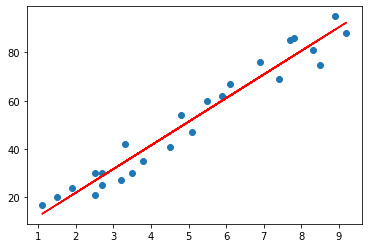

In [38]:
line=rg.intercept_+rg.coef_*x
plt.scatter(x,y)
plt.plot(x,line,color="red")

In [ ]:
#making_predictions

hours=np.array([9.25])
hours=hours.reshape(1,-1)
ans=rg.predict(hours)
print(ans) #answer for the question

[92.91505723]


In [ ]:
#Evaluation
from sklearn import metrics
mean_abs=metrics.mean_absolute_error(y_test,y_pred)
mean_sqr=metrics.mean_squared_error(y_test,y_pred)
r=np.sqrt(mean_sqr)
print("Mean Absolute Error:",mean_abs)
print("Mean Squared Error",mean_sqr)
print("Root mean Squared value",r)

Mean Absolute Error: 4.419727808027651
Mean Squared Error 22.965097212700428
Root mean Squared value 4.7921912746363144
